# An Introduction to SHAP Values and Machine Learning Interpretability

Machine learning models are powerful but hard to interpret. However, SHAP values can help you understand how model features impact predictions.

Machine learning models are becoming increasingly complex, powerful, and able to make accurate predictions. However, as these models become "black boxes," it's even harder to understand how they arrived at those predictions. This has led to a growing focus on machine learning interpretability and explainability.

For example, you applied for a loan at a bank but were rejected. You want to know the reason for the rejection, but the customer service agent responds that an algorithm dismissed the application, and they cannot determine the reason why. This is frustrating, right? You deserve an explanation for the decision that affects you. That's why companies try to make their machine learning models more transparent and understandable.

One of the most promising tools for this process is SHAP values, which measure how much each feature (such as income, age, credit score, etc.) contributes to the model's prediction. SHAP values can help you see which features are most important for the model and how they affect the outcome.

In this tutorial, we will learn about SHAP values and their role in machine learning model interpretation. We will also use the `Shap` Python package to create and analyze different plots for interpreting models.

## What are SHAP Values?

SHAP (SHapley Additive exPlanations) values are a way to explain the output of any machine learning model. It uses a game theoretic approach that measures each player's contribution to the final outcome. In machine learning, each feature is assigned an importance value representing its contribution to the model's output.

SHAP values show how each feature affects each final prediction, the significance of each feature compared to others, and the model's reliance on the interaction between features.

## SHAP Values in Machine Learning

SHAP values are a common way of getting a consistent and objective explanation of how each feature impacts the model's prediction.

SHAP values are based on game theory and assign an importance value to each feature in a model. Features with positive SHAP values positively impact the prediction, while those with negative values have a negative impact. The magnitude is a measure of how strong the effect is.

SHAP values are model-agnostic, meaning they can be used to interpret any machine learning model, including:

- Linear regression
- Decision trees
- Random forests
- Gradient boosting models
- Neural networks

## The Properties of SHAP Values

SHAP values have several useful properties that make them effective for interpreting models:

### Additivity

SHAP values are additive, which means that the contribution of each feature to the final prediction can be computed independently and then summed up. This property allows for efficient computation of SHAP values, even for high-dimensional datasets.

### Local accuracy

SHAP values add up to the difference between the expected model output and the actual output for a given input. This means that SHAP values provide an accurate and local interpretation of the model's prediction for a given input.

### Missingness

SHAP values are zero for missing or irrelevant features for a prediction. This makes SHAP values robust to missing data and ensures that irrelevant features do not distort the interpretation.

### Consistency

SHAP values do not change when the model changes unless the contribution of a feature changes. This means that SHAP values provide a consistent interpretation of the model's behavior, even when the model architecture or parameters change.

Overall, SHAP values provide a consistent and objective way to gain insights into how a machine learning model makes predictions and which features have the greatest influence.

## How to Implement SHAP Values in Python

In this section, we will calculate SHAP values and visualize feature importance, feature dependence, force, and decision plot. You can find a code source, dataset, and visualizations on [DataLab](https://www.datacamp.com/datalab/w/bccf1d9c-553c-4e0f-840e-6f6abf0c9601).

### Setting Up

Install SHAP using [PyPI](https://pypi.org/project/shap):

Load the [Telecom Customer Churn](https://www.datacamp.com/workspace/datasets/dataset-python-telecom-customer-churn). The dataset looks clean, and the target column is “Churn.”

In [3]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

customer = pd.read_csv("customer_churn.csv")
customer.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


### Model Training and Evaluation

1. Create X and y using a target column and split the dataset into train and test.
2. Train Random Forest Classifier on the training set.
3. Make predictions using a testing set.
4. Display classification report.

In [4]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = customer.drop("Churn", axis=1) # Independent variables
y = customer.Churn # Dependent variable

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       815
           1       0.81      0.84      0.82       130

    accuracy                           0.95       945
   macro avg       0.89      0.90      0.90       945
weighted avg       0.95      0.95      0.95       945



The model has shown better performance for “0” label than “1” due to an unbalanced dataset. Overall, it is an acceptable result with 94% accuracy.

Check out our [Classification in Machine Learning](https://www.datacamp.com/blog/classification-machine-learning) guide to learn about classification in machine learning with Python examples.

### Setting up SHAP Explainer

Now comes the model explainer part.

We will first create an explainer object by providing a random forest classification model, then calculate SHAP value using a testing set.

In [8]:
X_test.dtypes

Call Failure                 int64
Complaints                   int64
Subscription Length          int64
Charge Amount                int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
dtype: object

In [10]:
!pip install shap

Note: you may need to restart the kernel to use updated packages.


In [9]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

In the future `np.bool` will be defined as the corresponding NumPy scalar.


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### Summary Plot

Display the `summary_plot` using SHAP values and testing set.

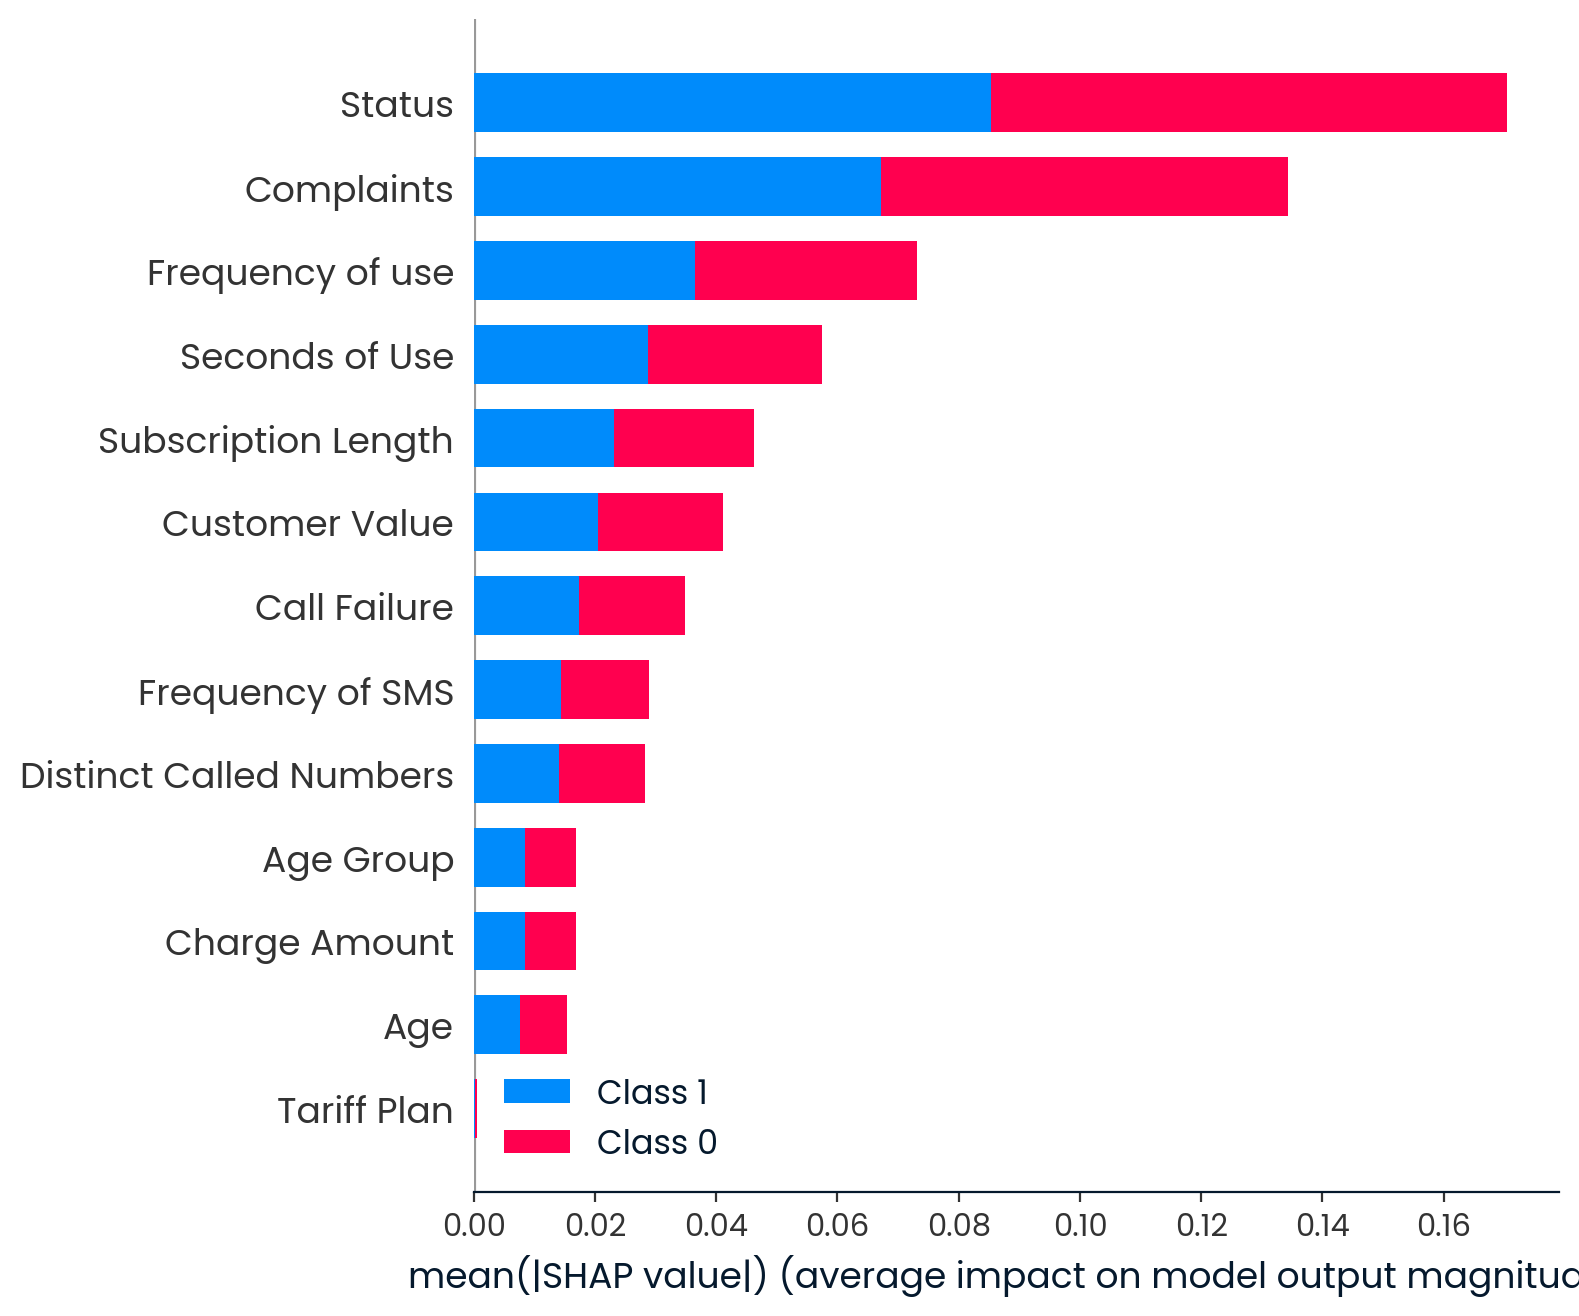

In [5]:
shap.summary_plot(shap_values, X_test)

The summary plot shows the feature importance of each feature in the model. The results show that “Status,” “Complaints,” and “Frequency of use” play major roles in determining the results.



Display the `summary_plot` of the label “0”.

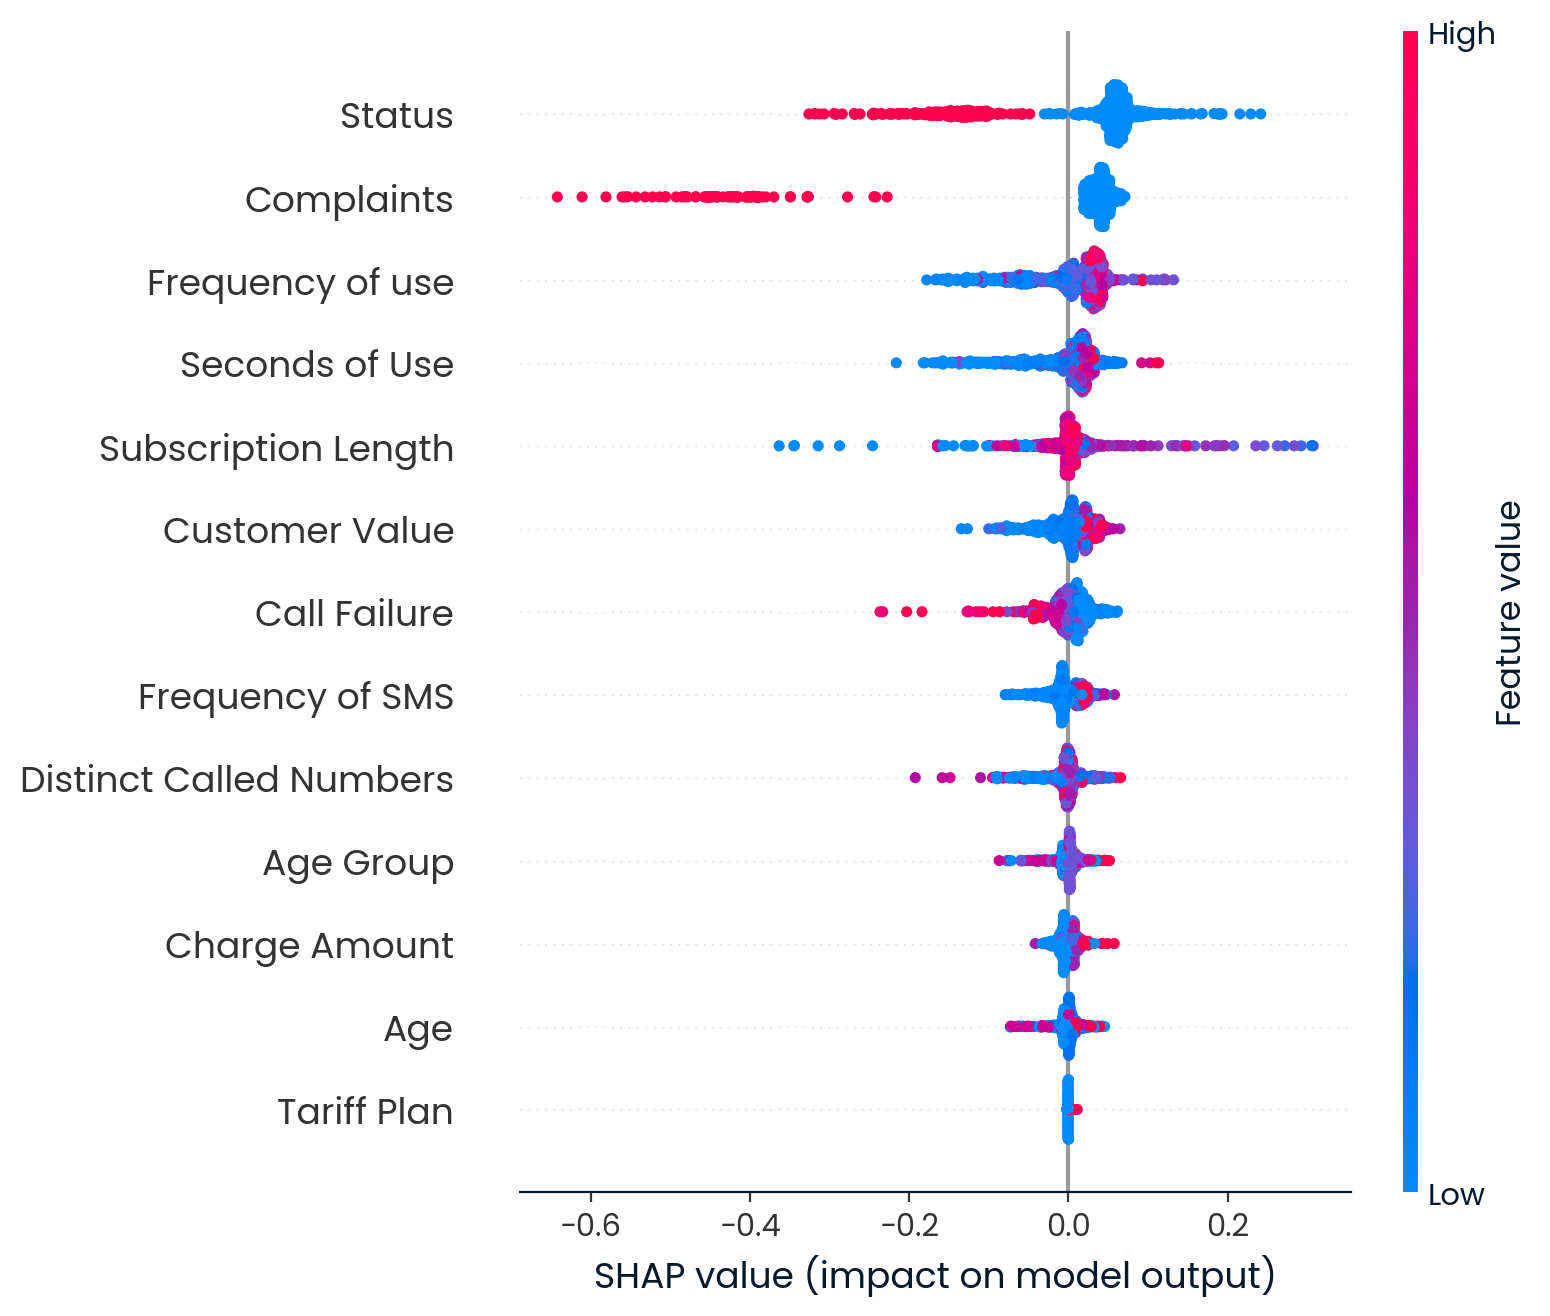

In [6]:
shap.summary_plot(shap_values[0], X_test)

- **Y-axis** indicates the feature names in order of importance from top to bottom.
- **X-axis** represents the SHAP value, which indicates the degree of change in log odds.
- The **color** of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low values.
- Each **point** represents a row of data from the original dataset.


If you look at the feature “Complaints ', you will see that it is mostly high with a negative SHAP value. It means higher complaint counts tend to negatively affect the output.

**Note**: for label “1” the visualization will be flipped.



### Dependence Plot

Visualize the `dependence_plot` between the feature “Subscription Length” and “Age.”

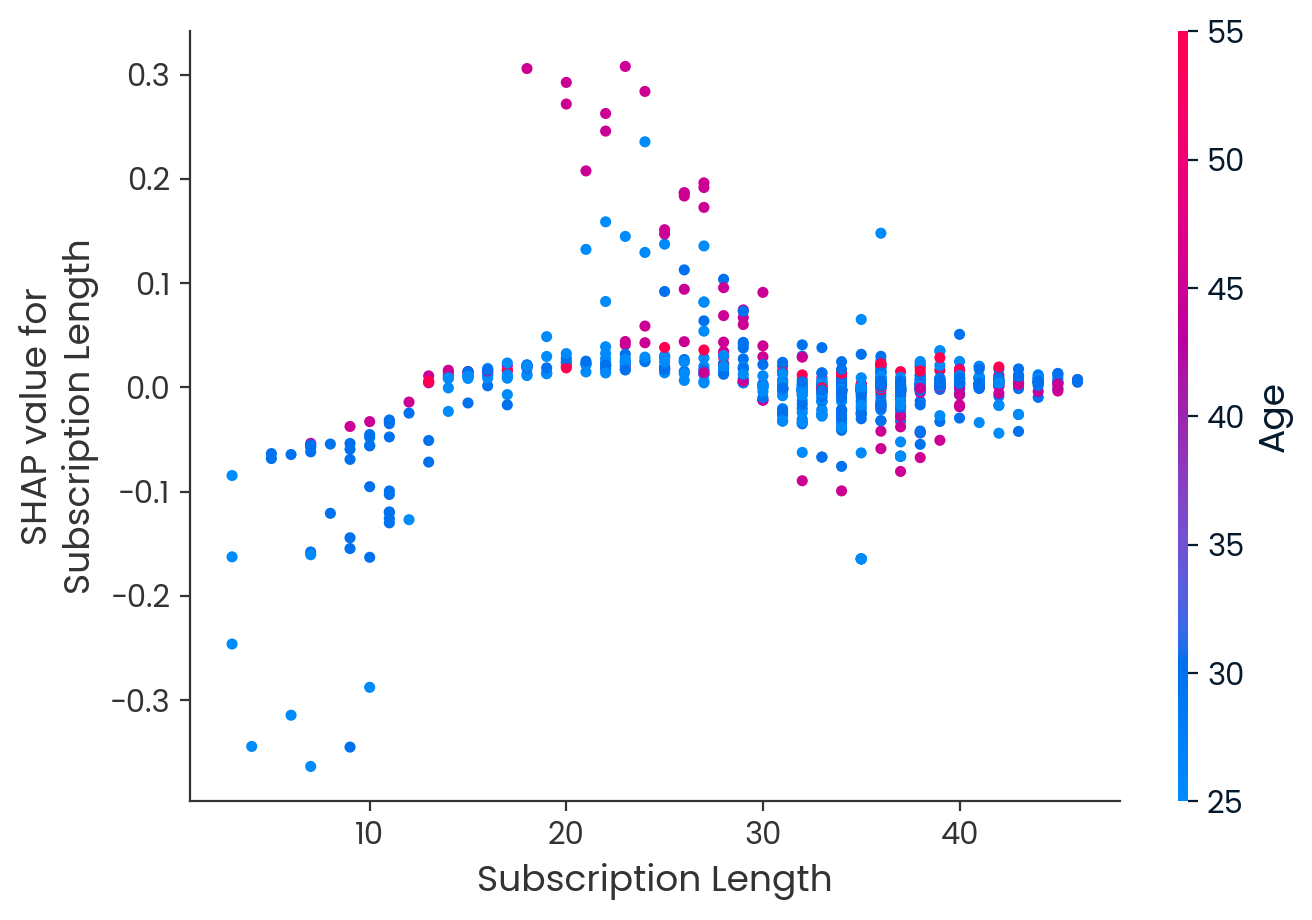

In [7]:
shap.dependence_plot("Subscription Length", shap_values[0], X_test,interaction_index="Age")

A dependence plot is a type of scatter plot that displays how a model's predictions are affected by a specific feature (Subscription Length). On average, subscription lengths have a mostly positive effect on the model.

### Force Plot

We will examine the first sample in the testing set to determine which features contributed to the "0" result. To do this, we will utilize a force plot and provide the expected value, SHAP value, and testing sample.

In [15]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

We can clearly see that zero complaints and zero call failures have contributed to negative to loss of customers.



Let’s look at customer churn samples with label “1”.

In [16]:
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)

You can see all of the features with the value and magnitude that have contributed to a loss of customers. It seems that even one unresolved complaint can cost a telecommunications company.



### Decision Plot

We will now display the `decision_plot`. It visually depicts the model decisions by mapping the cumulative SHAP values for each prediction.

In [17]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

Each plotted line on the decision plot shows how strongly the individual features contributed to a single model prediction, thus explaining what feature values pushed the prediction.

**Note**: The target label “1” decision plot is tilted towards “1”.



Display the decision plot for the target label “0”

In [18]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)

For the decision plot is tilted towards “0”.

## Application of SHAP Values

Apart from machine learning interpretability and explainability, SHAP value can be used for:

- **Model debugging.** By examining the SHAP values, we can identify any biases or outliers in the data that may be causing the model to make mistakes.
- **Feature importance**. Identifying and removing low-impact features can create a more optimized model.
- **Anchoring explanations**. We can use SHAP values to explain individual predictions by highlighting the essential features that caused that prediction. It can help users understand and trust a model's decisions.
- **Model summaries**. It can provide a global summary of a model in the form of a SHAP value summary plot. It gives an overview of the most important features across the entire dataset.
- **Detecting biases**. The SHAP value analysis helps identify if certain features disproportionately affect particular groups. It enables the detection and reduction of discrimination in the model.
- **Fairness auditing**. It can be used to assess a model's fairness and ethical implications.
- **Regulatory approval**. SHAP values can help gain regulatory approval by explaining the model's decisions.

## Conclusion

We have explored SHAP values and how we can use them to provide interpretability for machine learning models. While having an accurate model is essential, companies need to go beyond accuracy and focus on interpretability and transparency to gain the trust of users and regulators.

Being able to explain why a model made a particular prediction helps debug potential biases, identify data issues, and justify the model's decisions.

If you're new to machine learning and looking to become job-ready, consider taking the [Machine Learning Scientist with Python](https://www.datacamp.com/tracks/machine-learning-scientist-with-python) career track. This program will help you master the necessary Python skills to become a machine learning scientist and land a job.